# Question 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy.fft as fft
from scipy.signal import convolve2d
import time

In [2]:
root = './DIP_2019_A3/'

In [3]:
img = np.float32(cv2.imread(root+'lena.jpg', cv2.IMREAD_GRAYSCALE))
# filt = np.array([[1,1,1],[1,-8,1],[1,1,1]])
filt = np.random.random((10,10))
filt = filt/np.sum(filt)

fourier domain 0.08592486381530762
conv2d 0.0951387882232666
True


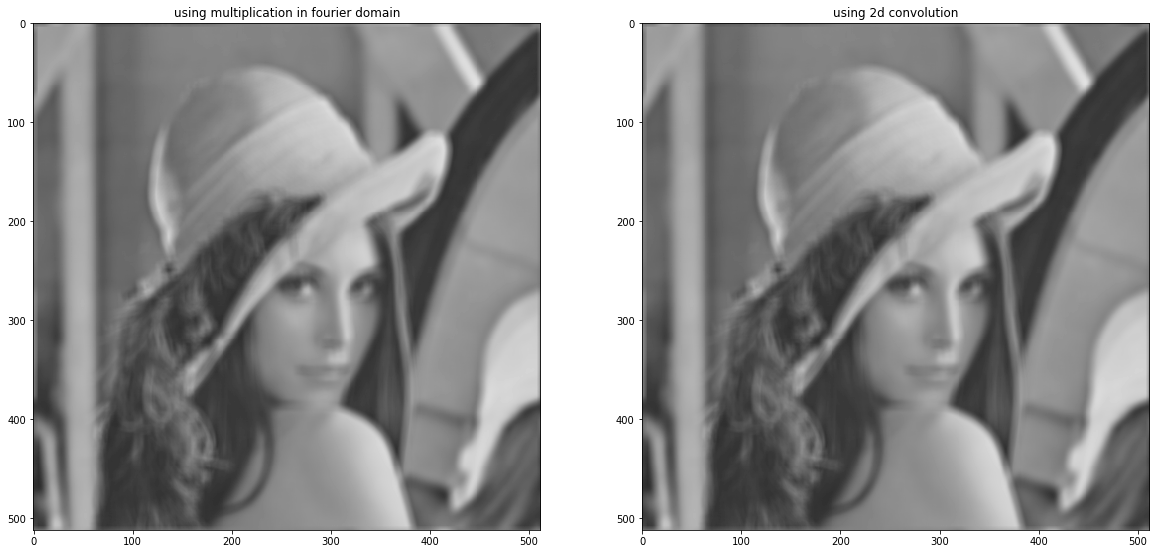

In [4]:
start = time.time()
f1 = fft.ifft2(fft.fft2(img, img.shape)*fft.fft2(filt, img.shape))
f1 = np.roll(f1, (-((filt.shape[0] - 1)//2), -((filt.shape[1] - 1)//2)), axis=(0, 1))
end = time.time()
print('fourier domain', end-start)

start = time.time()
f2 = convolve2d(img, filt, boundary='wrap', mode='same')
end = time.time()
print('conv2d', end-start)
print(np.allclose(f1,f2))


_,plts = plt.subplots(1,2,figsize=(20,20))
plts[0].imshow(f1.real, cmap='gray', vmin=0, vmax=255)
plts[0].set_title('using multiplication in fourier domain')
plts[1].imshow(f2.real, cmap='gray', vmin=0, vmax=255)
plts[1].set_title('using 2d convolution')
plt.show()

### Plots time v/s filter size

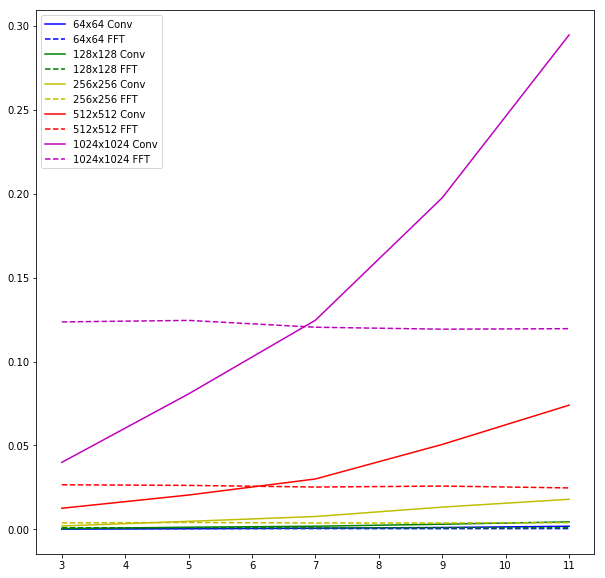

In [5]:
sz = [64, 128, 256, 512, 1024]
k = [3, 5, 7, 9, 11]
plt.figure(figsize = (10,10))
color = ['b', 'g', 'y', 'r', 'm']
for i in range(len(sz)):
    tm1 = []
    tm2 = []
    img = cv2.resize(img, (sz[i],sz[i]))
    for j in k:
        filt = np.random.random((j,j))
        filt = filt/np.sum(filt)
        st = time.time()
        f2 = convolve2d(img, filt, boundary='wrap', mode='same')
        tm1.append(time.time() - st)
        st = time.time()
        f1 = fft.ifft2(fft.fft2(img, img.shape)*fft.fft2(filt, img.shape))
        f1 = np.roll(f1, (-((filt.shape[0] - 1)//2), -((filt.shape[1] - 1)//2)), axis=(0, 1))
        tm2.append(time.time()-st)
    plt.plot(k,tm1, color = color[i], label = str(sz[i]) + 'x' + str(sz[i]) + ' Conv')
    plt.plot(k,tm2, color = color[i], linestyle='dashed', label = str(sz[i]) + 'x' + str(sz[i]) + ' FFT')
plt.legend()    
plt.show()

### Observations
- If dimensions f and h are increased then this leads to increase in computation complexity for covolve2d therefore a huge spike in run time. But fft operation is o(nlogn) thus it does not spike as such